<a href="https://colab.research.google.com/github/BrianChegeGichau/HassConsultingLimited/blob/master/Week7Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question 

# Understanding the context.

**Hass Consulting Company**


The company offers investment - grade developments all over the world. The developments they offer have been conceptualized by the development team to be high quality assets using a data driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth. 

The company has its own property price index called the Hass Index with over 17 years of historical data of Kenya's property markets. It has proven over the last decade to be an important tool providing investors, home owners, the financial industry and consumers with current and historical information about house price infation allowing them to make informed decisions in the housing market in order to enjoy the best possible returns.

As a data scientist, I have been tasked to study the factos that affect housing prices using the given information on real estate properties that was collected over the past few months. 

Then later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

# Objective of Study

The main objective of this study is to :
Perform modelling using the following regression techniques then evaluate their performance.
1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression.

# Metric for Success

The following are the facors that will determine the success of the study.
1. Fit the data in the regression models.
2. Provide recommendations on their appropriateness of solving the given problem.
3. Evaluation of the models.

# The Experimental Design

The following are the steps taking during the study:
1. Read and exploring the dataset.
2. Define the appropriateness of the available data to answer the given question.
3. Find and deal with outliers, anomalies and missing data within the dataset.
4. Perform univariate, bivariate and multi-variate analysis recording observations.
5. Check for multi-collinearity.
6. Performing regression analysis.
7. Providing the receommendation based on the analysis.
8. Challenging the solution by providing insights on how to make model improvements.

# Reading and exploring the dataset

In [1]:
#Importing the necessary library to read the dataset.
import pandas as pd

In [2]:
#Reading the dataset and previewing the 5 top rows.
df = pd.read_csv('Independent Project Week 7 - house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Previewing the last rows of the dataset.
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#Checking the shape of our dataset
df.shape
#Our dataset has 21613 rows and 20 columns.

(21613, 20)

In [ ]:
#Checking the datatypes of our predictor variables and for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
#Getting the basic statistics of our dataset.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [3]:
#Checking for duplicated rows in our dataset
df.duplicated().any()
#There are dupliacted rows in our dataset

True

In [4]:
#Dropping dupliactes in our dataset
df = df.drop_duplicates()

In [5]:
#Confirming for presence of duplicated rows
df.duplicated().any()
#No duplicated rows

False

In [ ]:
#Checking for null values in the dataset.
df.isnull().any()
#There are no null values in the dataset.

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
#I dropped the id column since it won't be useful in our analysis
df = df.drop(['id'],axis=1)
#I reset the inde to start correctly for easier analysis.
df = df.reset_index(drop=True)

In [ ]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Previewing the dataset
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['lat'].nunique()

5034

In [ ]:
df['long'].nunique()

752

I found that there was a funny pattern in the renoavtion year in the dataset. Where some rows had years while had 0. So I decided to investigate the number of rows that had years.

In [ ]:
#Printing out the shape of the rows that had years
df0 = df[df['yr_renovated'] != 0]
df0.shape

(913, 19)

This showed that 913 houses in our dataset had been renovated. So I decided to use the data to show which houses had actually been renovated instead of the years that they had been renovated.

In [7]:
#Changing the years to 1 to make it a binary result.
df.loc[(df.yr_renovated != 0),'yr_renovated']='1'
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Changing the column name from year renovated to renovated to display whether a house was renovated or not.
df = df.rename(columns = {'yr_renovated' : 'renovated'})

In [9]:
#I decided to drop the latitude and longitude since the zipcode provides that information

df = df.drop(['lat','long'],axis=1)

In [10]:
#Previewing the dataset
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


An **outlier** is a data point that differs significantly from other observations.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


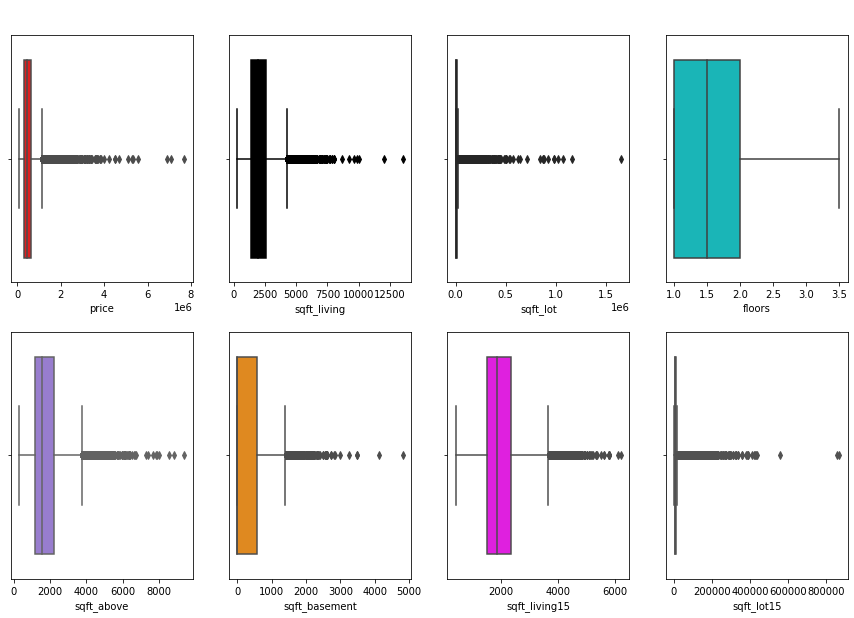

In [ ]:
#Checking for outliers
#Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Defining the columns to check for outliers.
cols = ['price','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
#Defining the colors to be used in the boxplots
colors = ['red','black','green','darkturquoise','mediumpurple','darkorange','fuchsia','blueviolet']
#Used a for loop to plot boxplots for each of the selected columns.
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),df,cols,colors):
  sns.boxplot(df[column], ax=ax, color=color)
  ax.set_facecolor('white')

In our dataset there are presence of outliers but I chose not to drop them since they will be of importance to the prediction of house prices. Since the outliers are in every column selected except the floors one, it seems to be data that will be very useful for the modelling hence won't be dropped.

# Data Exploration

In [ ]:
# creating a list of columns of interest
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living','floors','waterfront','view','condition','grade','yr_built']

#Obtaining the mode of the columns mentioned

for column in columns:
  print(column +':' + str(df[column].mode()))

price:0    350000.0
1    450000.0
dtype: float64
bedrooms:0    3
dtype: int64
bathrooms:0    2.5
dtype: float64
sqft_living:0    1300
dtype: int64
floors:0    1.0
dtype: float64
waterfront:0    0
dtype: int64
view:0    0
dtype: int64
condition:0    3
dtype: int64
grade:0    7
dtype: int64
yr_built:0    2014
dtype: int64


I found that most houses were not viewed. This shows Hass Consulting Limited should work on advertising their houses since this shows a lack of customer interest in this homes. 

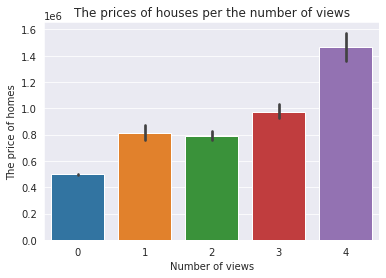

In [ ]:
#Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
df_1 = df.groupby('price').sum()
df_1 = df_1.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['view'], y = df['price'], data=df_1)
plt.xlabel('Number of views')
plt.ylabel('The price of homes')
plt.title('The prices of houses per the number of views')
plt.show()

It was noted that the houses that received the highest number of views were also the most expensive ones. The highest number of views that a house got was 4 views. There were also a number of houses that received no views at all but they were the houses that were least priced.

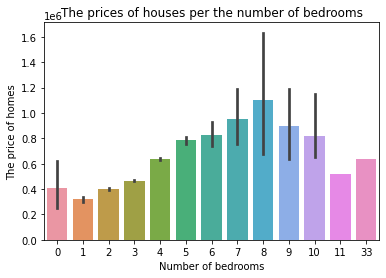

In [ ]:
#Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
df_2 = df.groupby('price').sum()
df_2 = df_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['bedrooms'], y = df['price'], data=df_2)
plt.xlabel('Number of bedrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses per the number of bedrooms')
plt.show()

The graph shows that 8 bedroom houses tend to be more expensive than any other followed by the 7 bedroom houses then the 9 bedroom houses.
The one bedroom houses tend to be the least expensive.

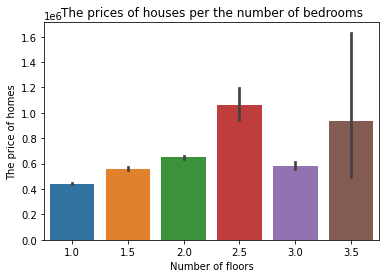

In [ ]:
#Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
df_2 = df.groupby('price').sum()
df_2 = df_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['floors'], y = df['price'], data=df_2)
plt.xlabel('Number of floors')
plt.ylabel('The price of homes')
plt.title('The prices of houses per the number of bedrooms')
plt.show()

I also noted that the houses that had 2 and a half floors were the most expensive houses followed by the ones that had 3 and a half floors. The one floor houses were the least valued priced houses.

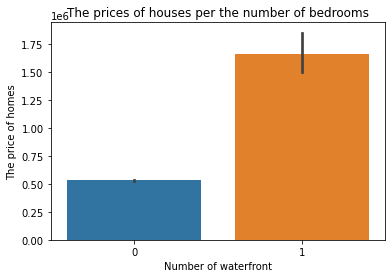

In [ ]:
#Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
df_2 = df.groupby('price').sum()
df_2 = df_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['waterfront'], y = df['price'], data=df_2)
plt.xlabel('Number of waterfront')
plt.ylabel('The price of homes')
plt.title('The prices of houses per the number of bedrooms')
plt.show()

It is also seen that houses that had waterfronts were highly valued than the houses that had no waterfronts. Waterfronts therefore increase the value of a house.

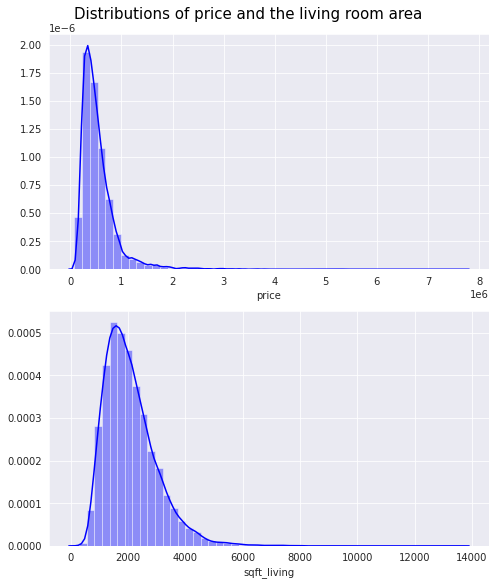

In [ ]:
# Plotting a histogram for the price and the living room area.
columns = ['price','sqft_living']
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of price and the living room area', y= 1.01, color = 'black', fontsize = 15)

for ax, data, col in zip(axes.flatten(), df, columns):
  sns.distplot(df[col], ax = ax, kde = True, color = 'blue')
plt.tight_layout()

Both the price and living room assume a normal distribution.

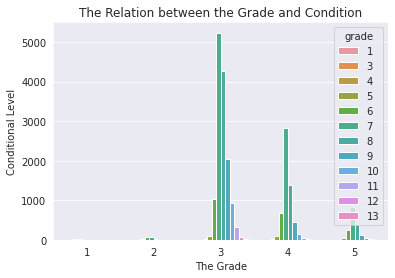

In [ ]:
#Plotting the graphs using the seaborn countplot
sns.countplot(x = 'condition', hue = 'grade', data=df)
plt.xlabel('The Condition')
plt.ylabel('Conditional Level')
plt.title('The Relation between the Grade and Condition')
plt.show()

It is noted that most houses fall in the 3rd and 4 th Condition. For the 3rd condition the houses fell within the 7th grade with slightly over 5000 houses followed by the 8th grade with slightly over 4000 houses. The houses in the 4th condition had most of them falling in the 7th grade followed by the 8th grade. This shows that most houses have an average performance in terms of quality.

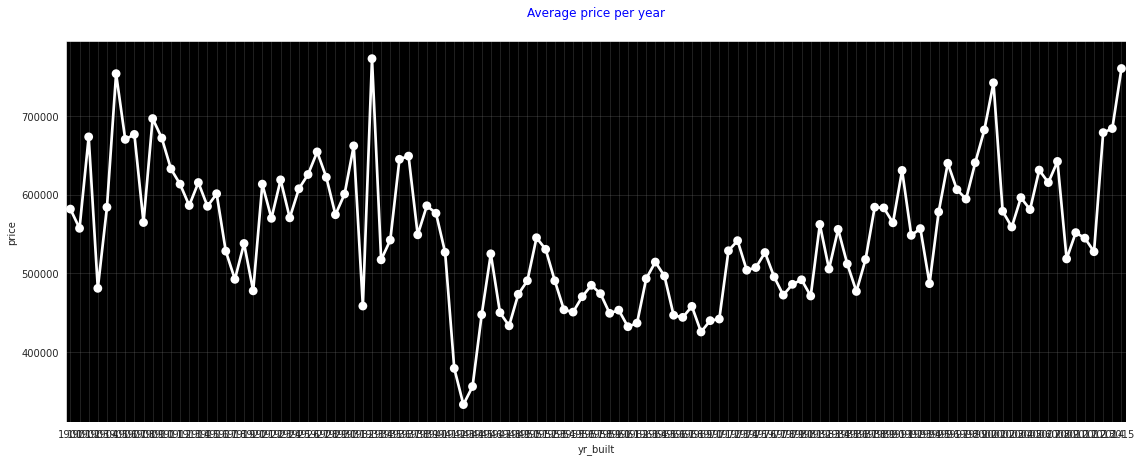

In [ ]:
prices = df.groupby('yr_built')['price'].mean().reset_index()
# Changing the datatype of the year column to int
prices.yr_built = prices.yr_built.astype(int) 
# Setting the figure size of the plot to 19 by 7
plt.figure(figsize=(19,7))
# Plotting a pointplot to show the trend of average price across the years
ax = sns.pointplot(prices.yr_built,prices.price,color="w") 
# setting the background color to black, for contrast
ax.set_facecolor("k") 
plt.grid(True,color="grey",alpha=.3)
plt.title("Average price per year",color='b', y = 1.05) 
plt.show()

The price of the houses over the years seem to be have been the same except for a deep that occurred in between probably through economic recessions, political instability or wars. But upscaled and increased and had its high notch in 2015 the last year in our dataset.

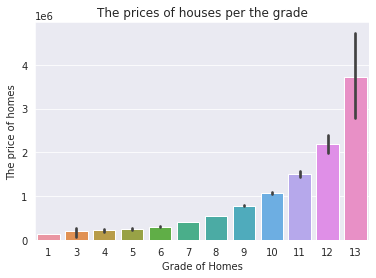

In [ ]:
#Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
df_1 = df.groupby('price').sum()
df_1 = df_1.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['grade'], y = df['price'], data=df_1)
plt.xlabel('Grade of Homes')
plt.ylabel('The price of homes')
plt.title('The prices of houses per the grade')
plt.show()

The homes that had a higher grade were most expensive compared to the ones that had lower grade. In this case Grade 13 had the most expensive houses compared to grade 1 that had the least price.

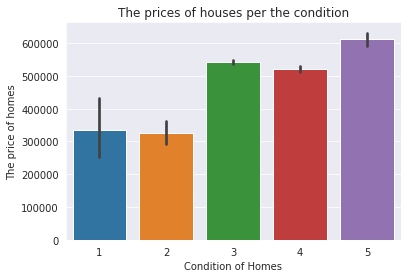

In [ ]:
#Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
df_1 = df.groupby('price').sum()
df_1 = df_1.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['condition'], y = df['price'], data=df_1)
plt.xlabel('Condition of Homes')
plt.ylabel('The price of homes')
plt.title('The prices of houses per the condition')
plt.show()

It was observed that houses that had condition 5 were the most expensive houses followed by the ones that had condition 3. Followed by the ones that had condition 4. This is particularly intriguing given the fact that condition 4 stands a better chance to have more expensive house since its in a better condition than houses that have the condition 3.

This intrigued me to do a hypothesis test to confirm if indeed the two means were equal. 
My null hypothesis was that the mean price of houses in condition 4 were greater or equal to the ones in condition 3. The alternative hypothesis is that condition 3 houses prices mean was less that of condition 4. This is summarized as follows:

 H₀ :μ(Condition 4) >= μ(Condition 3)    
 H₁ :μ(Condition 4) < μ(Condition 3)

This hypothesis is proved in the following 

In [ ]:
#I created a new dataframe that had condition 3 
df3 = df[df['condition'] == 3]

#I created a new dataframe that had condition 4
df4 = df[df['condition'] == 4]

In [ ]:
#I found the mean price of the houses that had condition 3
df3['price'].mean()

542093.1081331527

In [ ]:
#I found the mean price of the houses that had condition 4
df4['price'].mean()

521295.65075730893

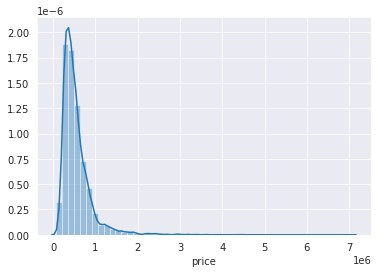

In [ ]:
#Finding out the distribution of the prices that had condition 3 
sns.distplot(df3['price'])
#The data seems to follow a normal distribution

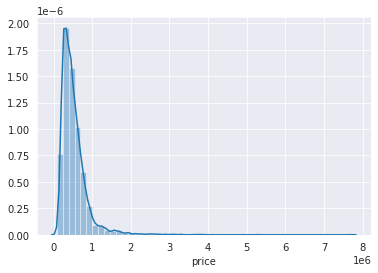

In [ ]:
#Finding out the distribution of the houses that had condition 4
sns.distplot(df4['price'])
#The data seems to take a normal distribution

I decided to use a z-test for our hypothesis test. This is because some of the assumptions are satisfied such as:
1. I assumed the data that we had was a population and the standard deviation was known.
2. The data followed a normal probability distribution.
3. The samples from the population must be independent of one another.(This is to be satisfied later where we will pick the samples using random sampling).

In [ ]:
#Finding out the sample size of the houses with condition 3
from scipy.stats import norm
condition3 = df3.shape[0]
condition3_size = int(0.1 * condition3)
condition3_size

1402

In [ ]:
#Finding out the sample size of the houses with condition 4
condition4 = df4.shape[0]
condition4_size = int(0.1 * condition4)
condition4_size

567

In [ ]:
#Sampling our data using random sampling for the houses that have condition3 and condition 4 
condition3_sample_data = df3.sample(n = condition3_size, replace='False')
condition4_sample_data = df4.sample(n = condition4_size, replace='False')

In [ ]:
#Importing the necssary library for the z test
from statsmodels.stats import weightstats as stests
#Calculating the pvalue using the mean prices for the condition 3 and condition 4.
ztest, pval1 = stests.ztest(condition4_sample_data['price'], x2 = condition3_sample_data['price'], value=0, alternative='two-sided')
alpha=0.05

print('The p-value is at : ',(pval1))

if pval1 < alpha:
  print('Reject the null hypothesis.')
if pval1 > alpha:
  print('Fail to reject the null hypothesis.')  

The p-value is at :  0.16041681252447348
Fail to reject the null hypothesis.


I found there was sufficient evidence at 95% confidence level to reject the alternative hypothesis. The condition 4 prices mean is actually greater than or equal to the condition 3 prices mean. This will help in defining price tags for the condition 4 houses and very insightful for Hass consulting Limited. That our earlier visualization has been challenged statistically to show that condition 4 houses have higher prices or equal to the condition 3 houses.

# Multi-Variate Analysis

This is normally based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcomes variables at a time.
Multi-variate analysis enables:
1. The exploration of data structures and patterns.
2. Probability computations of multi-dimensional regions.
3. The study and measurement of relationships.
4. Normal and general multivariate models and distribution theory.

There are three multivariate techniques namely : Principal Component Analysis, Factor Analysis and Linear Discriminant Analysis. 

Linear Discriminant Analysis is a linear transformation technique while the Principal Component Analysis is an unsupervised linear transformation technique since it ignores class labels.

We are doing the Supervised Learning Algorithm therefore I will perform the Linear Discriminant Analysis.

In [ ]:
#I decided to encode the zipcode column to be able to provide an accurate analysis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,55,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,1800,7503


In [ ]:
#Defining the X and y target variable
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
#Fitting our data into a linear discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()

lda_ = lda.fit(X,y)
lda_factors = lda_.transform(X)

In [ ]:
#Printing the co-efficients weights of the respectie columns
factors = pd.DataFrame(index = X.columns.values, data = lda_.coef_[0].T)
pd.options.display.float_format = '{:.8f}'.format
factors.sort_values(0, ascending=False)

,0
floors,1.24136833
renovated,0.48873182
yr_built,0.16114613
view,0.12076805
sqft_living,0.00296298
sqft_above,0.00213880
sqft_basement,0.00176410
sqft_living15,0.00008521
sqft_lot15,0.00003451
sqft_lot,-0.00000679


The number of floors, whether the house was renovated, the year the house was built, whether the house was viewed and the square feet of the living area impacted more on the overall price of a house.

In [ ]:
#Maintaining an original dataset of my cleaned dataset
original_copy = df.copy()

# Multiple Linear Regression

This is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. This is an extension of linear (Ordinary Least Squares) regression that uses only one explanatory variable.
There are assumptions taken during a multiple linear regression which are :
1. Linearity : There must be a linear relationship between the outcome variable and the independent variables.
2. No multicollinearity : Multiple regression assumes that the independent variables are not highly correlated with each other.
3. Homoscedasticity : This assumption states that the variance of error terms are similar across the values of the independent variables.
4. Normality : For any fixed value of X,Y is normally distributed.

We will do this checks for our multiple regression model and find out whether the assumptions have been fulfilled.

# Baseline model for the Linear Regression

In [11]:
X = df.drop(['price'],axis=1)
y = df['price']

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)

6907343.0835506655
[-3.93405355e+04  4.57206053e+04  1.09352225e+02 -2.52802164e-03
  2.71071709e+04  5.78740860e+05  4.34473360e+04  1.94660635e+04
  1.19863874e+05  5.14890832e+01  5.78631420e+01 -3.57888547e+03
  2.01163614e+04 -7.09374318e+00  2.47378378e+01 -5.50716672e-01]


# Checking for Multi-collinearity

The key goal of regression analysis is to isolate the relationship between each independent variables and the independent variable. The coefficient estimates can swing wildly based on which other independent variables are in the model.
Multi-collinearity reduces the precision of the estimate co-efficients which weakens the statistical power of the regression model and that is why it is important for us to remove the multicollinear variables to be able to build an efficient model.

In [ ]:
#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,location
price,1.00000000,0.30834618,0.51009585,0.70204587,0.08965769,0.23721526,0.26633152,0.39746598,0.03639690,0.66747845,0.60556870,0.32384890,0.05398031,-0.05316211,0.58538225,0.08245745,0.28199831
bedrooms,0.30834618,1.00000000,0.46751880,0.57667393,0.03169921,0.15566262,-0.00658309,0.07943331,0.02842205,0.35700265,0.47761863,0.30307658,0.15427561,-0.15272090,0.39163297,0.02923276,-0.01195246
bathrooms,0.51009585,0.46751880,1.00000000,0.69791415,0.08531324,0.48488551,0.05879885,0.17749674,-0.12596188,0.60666069,0.63996283,0.25091997,0.43360806,-0.15975521,0.51010561,0.08079385,0.02525511
sqft_living,0.70204587,0.57667393,0.69791415,1.00000000,0.17283036,0.35332673,0.10382012,0.28464062,-0.05876793,0.76271924,0.87660048,0.43505408,0.31809884,-0.19943479,0.75641957,0.18328523,0.04364045
sqft_lot,0.08965769,0.03169921,0.08531324,0.17283036,1.00000000,-0.00891924,0.02160100,0.07475262,-0.00896727,0.11364428,0.18352680,0.01527143,0.05310541,-0.12961139,0.14462018,0.71855609,-0.07190988
floors,0.23721526,0.15566262,0.48488551,0.35332673,-0.00891924,1.00000000,0.01965360,0.02452768,-0.29318841,0.47257728,0.51790344,-0.23580200,0.57866305,-0.09664545,0.29653749,-0.01323164,0.02518920
waterfront,0.26633152,-0.00658309,0.05879885,0.10382012,0.02160100,0.01965360,1.00000000,0.40199256,0.01665237,0.08278475,0.07207998,0.08058485,-0.02615907,0.03027709,0.08646913,0.03070157,-0.01897666
view,0.39746598,0.07943331,0.17749674,0.28464062,0.07475262,0.02452768,0.40199256,1.00000000,0.04583611,0.25137756,0.16765895,0.27699624,-0.05322947,0.08483801,0.28040425,0.07257717,-0.00149767
condition,0.03639690,0.02842205,-0.12596188,-0.05876793,-0.00896727,-0.29318841,0.01665237,0.04583611,1.00000000,-0.14465451,-0.15821220,0.17407108,-0.36134722,0.00296205,-0.09285383,-0.00342421,-0.01137229
grade,0.66747845,0.35700265,0.60666069,0.76271924,0.11364428,0.47257728,0.08278475,0.25137756,-0.14465451,1.00000000,0.75591871,0.16844297,0.44696587,-0.18479508,0.71320826,0.11926548,0.10669499


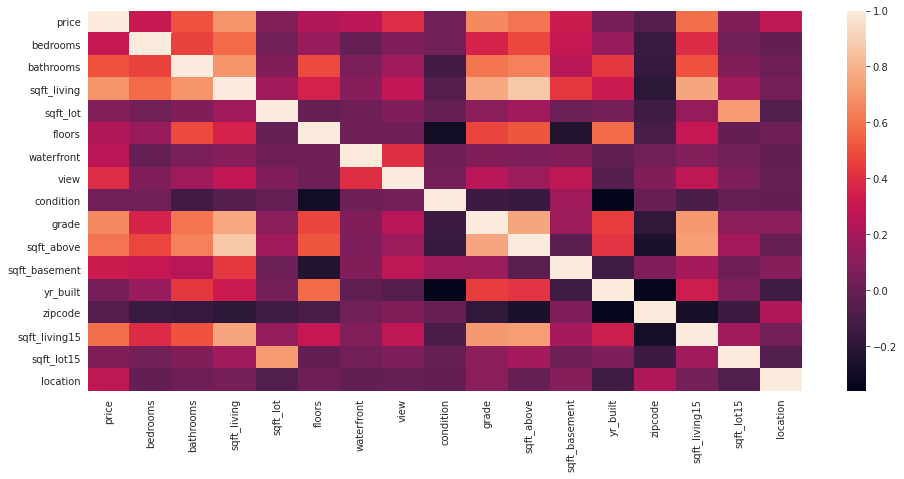

In [ ]:
#A heatmap showing the correlations in our dataset 
plt.figure(figsize = (16,7))
sns.heatmap(correlations)

The whiter areas show the areas that are highly correlated while the darker areas show the least correlated variables.

The Variance Inflation Factor (VIF) is the quotient of the variance in a model with multiple terms by the variance of a model with one term. It quantifies the severity of multi-collinearity in an ordinary least squares least squares regression analysis. It provides an index that measures how much the variance of an estimated regression coefficient is increased based on the collinearity.
Generally a VIF Score of more than 4 signals a high multi-collinearity between one predictor and the other predictors in a model. High values signifies a difficulty to assess accurately the contribution of predictors to a model.

In [ ]:
#Checking the VIF
pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,location
price,3.24317601,0.29369225,-0.34999197,-0.65837443,-0.01897449,-0.05770207,-0.45534603,-0.35863849,-0.13917706,-1.07870520,-0.64669708,-0.29255915,0.79823412,0.13328261,-0.10472494,0.12095226,-0.65457332
bedrooms,0.29369225,1.64754752,-0.31635577,-0.86690266,0.05027045,0.07121985,0.02236056,0.07824007,-0.08008447,0.18009797,-0.27620701,-0.17203645,0.10162414,0.08484278,0.02295284,0.10574363,-0.01840482
bathrooms,-0.34999197,-0.31635577,2.42591955,-1.55091700,-0.02239775,-0.53108017,0.05583960,-0.00438905,0.00151595,-0.06341213,0.53495845,0.08787502,-0.43153857,-0.03020201,0.18283986,0.03343874,0.05884607
sqft_living,-0.65891755,-0.87043165,-1.55332219,18051201393817.73437500,-0.13828046,-0.04878198,0.03079505,0.11858272,-0.36535768,-1.48099075,-16275333716200.39453125,-8698311972428.11914062,0.57802848,-0.13142383,-1.44709031,-0.15585151,0.22349159
sqft_lot,-0.01897449,0.05027045,-0.02239775,-0.13864583,2.09268595,0.06899335,0.03297942,-0.05223430,0.02728172,-0.01617727,-0.08831253,0.04125379,0.03772830,0.05255955,0.13691687,-1.47127850,0.04248717
floors,-0.05770207,0.07121985,-0.53108017,-0.04620314,0.06899335,2.14169783,-0.00541535,-0.04953192,0.10173644,-0.28149028,-0.41599308,0.54410732,-0.78218801,-0.22839380,0.26182742,0.10905514,-0.09394385
waterfront,-0.45534603,0.02236056,0.05583960,0.03146554,0.03297942,-0.00541535,1.26387612,-0.44571113,0.01843923,0.18933379,0.03307781,0.06070032,-0.09729183,-0.00412413,0.08083361,-0.03440503,0.10828430
view,-0.35863849,0.07824007,-0.00438905,0.11798527,-0.05223430,-0.04953192,-0.44571113,1.46934201,-0.00158575,-0.08118228,0.07974385,-0.25400883,0.09893176,-0.17449213,-0.29380968,-0.01716675,0.18514240
condition,-0.13917706,-0.08008447,0.00151595,-0.36503780,0.02728172,0.10173644,0.01843923,-0.00158575,1.21575839,-0.00125774,0.40973172,0.08153685,0.39562660,0.15250384,0.06600775,-0.02711366,0.07453265
grade,-1.07870520,0.18009797,-0.06341213,-1.47958491,-0.01617727,-0.28149028,0.18933379,-0.08118228,-0.00125774,3.66715831,0.15915555,0.35950431,-0.76755092,-0.13086179,-0.79517029,0.06875180,-0.07853428


In [ ]:
#Removing the sqft_above
revision = correlations.drop(['sqft_above'],axis=1)
correlations = revision.corr()


In [ ]:
#Getting the VIF Score of the new dataset
pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,location
price,19.57639619,-0.29721771,-1.09937084,-9.96479998,-3.13133422,-4.17363270,-5.56506121,-2.75659038,-7.62321746,-8.82320608,-1.81065651,-1.26020267,-5.40559420,-1.61954548,-1.31161675,-7.47250794
bedrooms,-0.29721771,17.03152512,-6.40228376,-16.09370152,11.50562363,14.80737805,10.83508017,4.25540457,26.51029341,-6.76296285,9.67115917,38.67768240,28.35148057,14.79013713,9.58997758,13.32268158
bathrooms,-1.09937084,-6.40228376,14.02835541,-4.84472833,-4.91863294,-9.55056696,-4.20536556,-1.75125448,-11.53468489,5.22207732,-4.97746392,-19.39664023,-12.08421326,-2.79431198,-3.55378449,-5.50533807
sqft_living,-9.96479998,-16.09370152,-4.84472833,58.72789973,-7.85507478,-11.75873660,-5.49925508,0.35146787,-13.99490800,-6.28401976,-12.88456958,-18.93181369,-16.47301313,-24.74998319,-6.91314808,-3.40778620
sqft_lot,-3.13133422,11.50562363,-4.91863294,-7.85507478,19.01530237,13.50168918,10.39364268,3.61419332,24.97083339,-8.33708302,8.86716646,35.19646448,25.95784815,14.29095518,0.18310421,12.95836000
floors,-4.17363270,14.80737805,-9.55056696,-11.75873660,13.50168918,27.64844804,12.90899349,4.30573391,31.12919664,-11.68061312,15.01903930,37.99100047,30.71580498,19.05803607,10.97166735,15.62192534
waterfront,-5.56506121,10.83508017,-4.20536556,-5.49925508,10.39364268,12.90899349,11.96252993,2.71338043,24.21852801,-5.90696158,8.47885931,32.70124507,25.00622775,12.63996665,7.79014823,13.01406459
view,-2.75659038,4.25540457,-1.75125448,0.35146787,3.61419332,4.30573391,2.71338043,4.06645974,9.26049911,-3.02102300,1.94422936,13.21553533,8.87312130,2.72893602,3.04614736,5.59011377
condition,-7.62321746,26.51029341,-11.53468489,-13.99490800,24.97083339,31.12919664,24.21852801,9.26049911,61.01463020,-19.60625811,19.55825687,84.73849694,61.87907801,30.11975888,19.32079232,30.82690056
grade,-8.82320608,-6.76296285,5.22207732,-6.28401976,-8.33708302,-11.68061312,-5.90696158,-3.02102300,-19.60625811,37.87548465,-4.56429166,-36.90161556,-22.12351808,-17.24931395,-5.43311252,-9.76320846


In [ ]:
#Removing the sqft_basement from the new dataset
revision = correlations.drop(['sqft_basement'],axis=1)
correlations = revision.corr()

In [ ]:
#Getting the VIF Score of the new dataframe
pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,location
price,2129.29158319,119.00022043,204.73063055,-2925.26002260,-303.24758095,-421.00334776,-483.39475591,-266.20878481,-974.36393156,-1249.00800595,-477.04916697,-747.70055834,773.56323400,-158.19997182,-729.71075500
bedrooms,119.00022043,319.29253146,-199.78355989,260.38425845,195.95572262,-17.03461805,154.35673236,114.65063633,652.45702131,-510.46868888,1597.10828420,814.40274088,52.33185397,196.80682188,266.24230860
bathrooms,204.73063055,-199.78355989,1500.72631468,-3374.81788722,-372.07150626,-583.06021119,-315.92998818,-249.20653833,-1263.34749877,1717.66832447,-2907.87914785,-1396.96536781,630.20816609,-273.32492904,-609.61191170
sqft_living,-2925.26002260,260.38425846,-3374.81788722,12572.08052384,1480.21688128,2145.57663540,1521.30978295,1002.53601921,4947.07465685,-4963.68803416,9211.05955313,5161.07001793,-1637.72604314,1023.23195959,2685.92477995
sqft_lot,-303.24758095,195.95572262,-372.07150626,1480.21688127,615.68841868,190.78228040,285.59691222,175.18746519,995.31664796,-1005.24871918,2074.15275644,1131.72709397,101.77954421,-88.86208290,486.30352254
floors,-421.00334776,-17.03461805,-583.06021119,2145.57663540,190.78228040,565.06968330,200.67970849,151.72100005,680.68207000,-1149.52037038,1149.01258417,671.29169135,-151.47654959,146.65944711,387.01242437
waterfront,-483.39475591,154.35673236,-315.92998818,1521.30978295,285.59691222,200.67970849,287.69069674,169.08046440,906.30397351,-572.15203040,1693.28627991,992.26698517,-105.58424179,199.21680876,469.95421750
view,-266.20878481,114.65063633,-249.20653833,1002.53601921,175.18746519,151.72100005,169.08046440,126.72627581,589.53456882,-430.81694911,1144.65293779,637.33609996,-108.18017007,142.67160847,304.05041166
condition,-974.36393156,652.45702131,-1263.34749877,4947.07465684,995.31664796,680.68207000,906.30397351,589.53456882,3206.35325536,-2951.32704932,6598.97583352,3622.49997332,-137.49453745,735.17555006,1561.53276811
grade,-1249.00800595,-510.46868888,1717.66832447,-4963.68803416,-1005.24871918,-1149.52037038,-572.15203040,-430.81694911,-2951.32704932,8186.49413009,-7934.31997288,-3738.29671070,-1676.00414656,-556.63851855,-1232.91395424


In [ ]:
#Removing the grade from the new dataset
revision = correlations.drop(['grade'],axis=1)
correlations = revision.corr()

In [ ]:
#Checking the VIF Score of the new dataframe
pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,sqft_living15,sqft_lot15,location
price,147507141.35222134,-27478664.02132099,76176986.85721043,-378520137.97503936,-36265665.58106057,-45308242.64747322,-44654612.90928635,-22970731.86397561,-181895755.83418751,-324801902.51189411,-200446367.42864901,87800411.45526576,-29846619.86457005,-77763265.17467010
bedrooms,-27478661.22213148,16927265.87765713,-10292156.08211038,61683414.04899820,11280537.92896668,1242188.45202276,12479368.98042829,6393735.65526594,55788984.74891336,115709884.11122526,67080534.10851391,-12259435.73174948,10241320.62757935,21273772.55476232
bathrooms,76176989.26172365,-10292158.29431961,56451974.91298772,-223943629.66575551,-16875191.57834290,-29344541.07365123,-21942910.96229078,-11734532.05742784,-89337812.79691823,-158534825.58230904,-95505053.33164036,63476989.90196350,-15035263.00309147,-38912406.99197863
sqft_living,-378520142.52424067,61683422.61352139,-223943625.90513369,1020200290.20665932,88869253.65555646,127453460.34273462,111950516.86871424,58339202.08703081,455005705.88018841,807606285.19249582,495387199.46219623,-256532782.51814926,75370903.65408128,196211719.49178678
sqft_lot,-36265664.43785301,11280538.39048937,-16875190.27763972,88869249.40642905,11171437.69402998,8130194.74297502,12575798.23289708,6430831.66857630,53063638.18563059,100967769.06793062,60674831.71825987,-19326738.15119373,8568388.69385349,21693631.14465483
floors,-45308244.73125248,1242189.77603674,-29344541.58367491,127453464.56723483,8130195.62744999,19375765.28037219,11211396.74706659,5901432.66886805,43007537.43684204,67656809.06483565,43654795.01311123,-33403235.32226145,6728087.71932796,19944467.95134476
waterfront,-44654611.94584227,12479369.65422382,-21942909.62209491,111950512.82587221,12575798.34924308,11211395.78976233,14995971.70412620,7710402.75988891,62862987.34552115,118034239.76790382,71236134.44298707,-25454768.71115449,10708734.35435599,25960384.80466647
view,-22970731.42052038,6393736.02118471,-11734531.39270160,58339200.13559311,6430831.74493293,5901432.18670971,7710402.77908961,3979956.70129413,32360527.17730153,60827366.61286447,36617992.54455842,-13605336.06211941,5550521.59409175,13367909.89137751
condition,-181895750.89138868,55788987.33829994,-89337806.66647865,455005686.54882240,53063638.42833243,43007533.17124529,62862987.04696939,32360526.94137586,265572243.24541771,504991548.03186828,302879656.84829319,-103786991.43787988,45749376.70565061,108713002.07239819
yr_built,-324801890.23949707,115709888.17953119,-158534812.38859382,807606241.03074694,100967768.70647244,67656800.23111612,118034238.21405326,60827365.65304822,504991543.86298686,980196868.66261816,582156791.59960222,-184392476.53933021,88302636.62201267,203706870.05975142


It is observed that multi-collinearity increases as we drop columns. This shows that multiple regression is not suited for this kind of data. Since one of the assumptions during a multiple regression model is that there should be no multi-collinearity.

# Multiple Linear Regression Modelling

In [13]:
#Defining the predictor values and the independent variable defined as X and y respectively.
X = df.drop(['price'],axis=1)
y = df['price']

In [14]:
#Splitting the train and test values in our dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
#Fitting the data in a linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Printing the regressor intercept and coefficients for our predictor variables.
print(regressor.intercept_)
print(regressor.coef_)

7755870.980742772
[-3.95197052e+04  4.14227124e+04  1.11227497e+02 -6.81884445e-03
  3.11370179e+04  5.44605342e+05  4.42799935e+04  1.89301428e+04
  1.18935832e+05  4.87466456e+01  6.24808513e+01 -3.50240365e+03
  2.25313593e+04 -1.71844306e+01  2.53855888e+01 -5.48154623e-01]


In [16]:
#Predicting the prices using our using our test data
y_predict = regressor.predict(X_test)

In [17]:
#Calculating the root mean squared error in of our predicted value
import numpy as np
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Root Mean Squared Error: 217057.24568469054


The RMSE of our linear regression model is **insane** therefore concurring with our earlier finding that it won't be a perfect fit for our data

In [18]:
#Finding the mean bias of our model 
residuals = np.subtract(y_predict, y_test)
pd.DataFrame(residuals).describe()

residuals.mean()

-6840.198258061635

The residuals is also so huge to work with as our model.

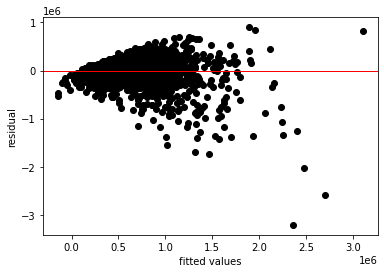

In [ ]:
#Plotting the residuals for our linear regression model.
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals mean line cut across the residuals.

The Bartlett test of homogeinity of variances is a test which allows us to deterimine whether the variances of a continuous variable are equal across two or more groupings of the data by a categorical (independent variable).
The bartlett test presumes that the distribution of the dependent variable is normal which our prices data assumed a normal distribution as shown in our data exploration therefore a Levene test won't be suitable. Therefore we will conduct a bartlett test.

In [ ]:
#Calculating the bartlett test using the chi-sqaure disribution.
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

inf
The variances are homogeneous!


The independent variables of the model were normally distributed.
The variances of the error terms were similar across the values of the independent variables.
The model had a linear relationship but had severe multicollinearity. This makes it biased and can't be used for our prediction.
Therefore the multiple regression model is not suited for this task.

# Quantile Regression

This is a type of quantile regression which estimates the conditional median (or other quantiles) of the response variable.
This an extension of the linear regression used when the conditions of the linear regression are not met such as the homoscedasticity. Our multiple regression met that assumption. One advantage of the quantile regression though is that its estimates are more robust against outliers in the response measurements. This might be particularly helpful in our research since we did not drop our outliers. Quantile regression takes the assumptions of the linear regression save for the homoscedasticity and since our model is heavily multi-collinear this model might not be a perfect fit for our data making it a limitation to work with.

In [ ]:
#defining the predictor variables and the target variable
X = df.drop(['price'],axis=1).values
y = df['price']

In [ ]:
#Finding the shape of the predictor variables
X.shape

(21610, 17)

In [ ]:
#Adding an extra array to our predictor variables to be able to perfrom a mathematical operation in the quantile regression
#Defining the mean and standard deviation of our extra array to be a normal distribution of mean 0 and standard deviation
#of 0.001 to reduce any manipulation of our data.
mu ,sigma = 0, 0.001
#Generating a normal random variables with the same shape as our dataset
noise = np.random.normal(mu, sigma , [21610,17])

In [ ]:
#Adding the noise to our predictor variables
X = X + noise

In [ ]:
#Performing a qauntile regression of the 50th percentile.
import statsmodels.formula.api as smf 
mod =smf.quantreg('y ~ X',df)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4538
Model:                       QuantReg   Bandwidth:                   2.034e+04
Method:                 Least Squares   Sparsity:                    2.703e+05
Date:                Thu, 30 Jul 2020   No. Observations:                21610
Time:                        05:36:38   Df Residuals:                    21592
                                        Df Model:                           17
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8168      0.804     -9.728      0.000      -9.392      -6.242
X[0]       -1.923e+04   1241.723    -15.490      0.000   -2.17e+04   -1.68e+04
X[1]        2.904e+04   1891.525     15.353      0.000    2.53e+04    3.27e+04
X[2]        -572.6629   5328.002     -0.107      0.9

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


A rule of thumb indicates that a pseudo r-squared of 0.2-0.4 indicates an excellent model fit. Our model has a pseudo r-squared of 0.4538 meaning its at par. The model also says that the sqft_living, waterfront, sqft_above and renovated columns are statistically insignificant since they crossed the 0.05 p-value mark. This model however cannot be trusted since it had serious multi-collinearity issues. And thus cannot trust the p-values as well.

# Ridge Regression

This is a technique for multiple regression data that suffer from multi-collinearity. It is an extension of linear regression and a regularization method which tries to avoid overfitting of data by penalizing large coefficients. This penalty factor penalizes high value of the tuning parameter called lambda which in turn shrinks the constants of the coefficients thereby reducing the mean squared error. The penalty parameter is only applied to the constants of the coefficients but not to the intercept since it is simply the mean value of the response variable. The penalty variable varies from 0 to infinity. We shall only select the lambda value such that it minimizes the mean sqaured error. We shall do cross validation to select lambda through a grid of values then compute cross validation error of each of that lambda value. We shall then finally select that value of lambda which gives the smallest cross validation predicted error. 
The higher the value of lambda the greater will be the shrinkage of the constant co-efficients and this in turn makes the co-efficients more robust to multi-collinearity. 
Ridge regression enforces the constants to converge to 0 but does not make their value 0. This means it will only reduce the impact of these variables on the model. The regression might make a good model of our data since it deals with multi-collinearity.

Baseline Model for the Ridge Regression.

In [19]:
#I defined the predictor and target variables as X and y respectively
X = df.drop(['price'],axis=1)
y = df['price']

In [20]:
#Fitting the X and y variables in a ridge regression.
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [22]:
#Getting the mean sqaured error of the baseline model
from sklearn.metrics import mean_squared_error
baseline_model = (np.sqrt(mean_squared_error(y_true = y, y_pred = ridge.predict(X))))
baseline_model

236759.66143448788

Hyperparameter tuning.

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [24]:
#Standardizing our predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [25]:
#I defined the lambda variable as alpha adn grid searched between the -5 and 2 values and used the mean sqaured error
#as the value to look at.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid = {'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [26]:
#Fitted our variables in the model.
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [27]:
#Searched for the best lamda score defined as alpha
search.best_params_
#I found the best scoring alpha value at 0.001

{'alpha': 0.001}

In [28]:
#I created a second model with the alpha value at 0.01 to find the best score
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [29]:
#Finding the mean squared error of the ridge model
from sklearn.metrics import mean_squared_error
second_model = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = ridge.predict(X_test))))
print("The RMSE of the ridge model is: ",second_model)

The RMSE of the ridge model is:  214547.7852723966


The mean squared error of the model is also huge posing challenges as well to work with as our model.

In [30]:
#Finding out the score of the ridge regression model
ridge.score(X_test,y_test) 
#The lasso model had an r squared score of 66%

0.6615187003535015

Our ridge regression model had an r squared score of 66%.

In [ ]:
#Printing out the variable coefficients of the ridge model.
coef_dict_baseline = {}
for coef,feat in zip(ridge.coef_,X.columns):
  coef_dict_baseline[feat] = coef 
coef_dict_baseline  

{'bathrooms': 42241.28985654531,
 'bedrooms': -40162.30129621821,
 'condition': 17810.62492187686,
 'floors': 30045.946979064138,
 'grade': 119443.0862749503,
 'renovated': 15484.841237963808,
 'sqft_above': 78.50442260820313,
 'sqft_basement': 90.49708870616406,
 'sqft_living': 84.91669717303874,
 'sqft_living15': 21.321565019679486,
 'sqft_lot': -0.0020697229385314396,
 'sqft_lot15': -0.542500925520877,
 'view': 44904.860467726045,
 'waterfront': 519817.25505477976,
 'yr_built': -3538.5125850036006,
 'zipcode': -44.867257484325684}

Though the ridge regression had high mean sqaured errors it did a good job in penalizing the constants coefficients in comparison to the mutliple and quantile regressions. This has reduced overfitting of the prediction model. Though a limiting factor of the ridge regression is that it includes all the predictors in the final model. It does not perform feature selection unlike its Lasso counterpart.

# Lasso Regression

This a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point like the mean. This particular type of regression is well suited for models showing high levels of multi-collinearity. Lasso performs L1 regularization which adds a penalty equal to the absolute value of the magnitude of the coefficients. Some coefficients can become 0 and be eliminated from the model. Larger penalties result in coefficients values closer to zero which is the ideal for producing simpler models. A tuning parameter lambda controls the strength of the L1 penalty. Though as lambda increases bias increases and as lambda decreases variance increases. Lasso might work well for our data which has high multi-collinearity and might help in feature selection and know which variables to drop for our model.

Baseline Model for the Lasso Regression Model.

In [62]:
#Defining the predictor variables and the target variable.
X = df.drop(['price'],axis=1)
y = df['price']

In [63]:
#Impoerting the Lasso regression which is an extension of the linear model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lasso = linear_model.Lasso()

In [64]:
#Fitting our data in a lasso regression
lasso.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
#Calculating the mean squared error
from sklearn.metrics import mean_squared_error

print('lasso RMSE: ', np.sqrt(mean_squared_error(y, lasso.predict(X))))

lasso RMSE:  216155.0120489682


The MSE of the Lasso baseline model is also huge. I'll work with hyperparameters to see whether anything will change.

**Hyperparameter tuning**

In [35]:
#Importing the necessary data for tuning our data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [36]:
#I defined the predictor and target variables as X and y respectively
X = df.drop(['price'],axis=1)
y = df['price']

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [38]:
#Standardizing our predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [41]:
#defining the alpha parameters
parameters = {'alpha':np.concatenate((np.arange(0.1,2,0.1),np.arange(2,5,0.5),np.arange(5,30,1)))}

In [42]:
#Grid Searching for the best parameters
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso,parameters,scoring='r2',n_jobs=1,refit=True,cv=30)
#I cross validated with 30 models

In [43]:
#Fitting the hyperparameters on a lasso model
gridlasso.fit(X_train,y_train)

GridSearchCV(cv=30, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. , 25. , 26. , 27. , 28. , 29. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [44]:
#Printing out the best hyperparameters
print('lasso best parameters: ',gridlasso.best_params_)

lasso best parameters:  {'alpha': 29.0}


The alpha parameters that worked for our model was 29

In [45]:
#Fitting the hyperparameters on a lasso regression model
lasso = linear_model.Lasso(normalize=True,alpha=29.0)
lasso.fit(X_train,y_train)

Lasso(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
#Printing out the MSE for the lasso model
print('lasso RMSE: ',np.sqrt(mean_squared_error(y_test,gridlasso.predict(X_test))))

lasso RMSE:  214578.1960910165


In [48]:
#Finding out the score of the lasso regression model
lasso.score(X_test,y_test) 
#The lasso model had an r sqaure score of 65%.

0.6591647333376167

Our LASSO model fitted 65% of the data.

In [ ]:
#Printing out the columns and the respective coefficients.
coef_dict_baseline = {}
for coef,feat in zip(lasso.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline 

{'bathrooms': 29410.075652122898,
 'bedrooms': -22335.63380868666,
 'condition': 8519.373786954126,
 'floors': 10821.843729395234,
 'grade': 119070.0441933784,
 'renovated': 1483.9740387809,
 'sqft_above': 0.0,
 'sqft_basement': 0.0,
 'sqft_living': 161.09563695952852,
 'sqft_living15': 10.827799264565623,
 'sqft_lot': -0.0,
 'sqft_lot15': -0.2686261232999802,
 'view': 46238.224728976995,
 'waterfront': 479273.05227301165,
 'yr_built': -3091.329790572391,
 'zipcode': 0.0}

The Lasso regression is advantageous since it does feature selection.In our data the sqft_above, sqft_basement, sqft_lot, zipcode were reducted out of our model. Lasso does shrinkage and variable selection of the pairwise correlations simultaneously for better prediction and model interpretation. Though Lasso only selects at most n variables before it saturates. It does not do group selection.

# Elastic Net Regression

The elastic net is a regularized regression that linearly combines the Ridge regression and LASSO penalties. It overcomes the limitations of the LASSO method which reduces the co-efficients of the constants to zero. The elastic net adds a quadratic part to the penalty. The quadratic term makes the loss function strongly convex and it therefore has a unique minimum.

Baseline model of the Elastic Net Regression.

In [49]:
#Dividing the the predictor variables and target variable.
X = df.drop(['price'],axis=1)
y = df['price']

In [50]:
#Fitting our predictor variables in an ElasticNet regression
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
elastic.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
#Finding the MSE Score of the elastic net regression
print('Elastic Net MSE:' ,np.sqrt(mean_squared_error(y_true = y,y_pred=elastic.predict(X))))

Elastic Net MSE: 367295.6510603655


Our Elastic Net RMSE is way too high.

**Hyper parameter tuning**

In [52]:
#Splitting our data into a train and test model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [53]:
#Standardizing our predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [54]:
#Searching for the best parameters for both parameters
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [55]:
#Fitting the data into our grid
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [56]:
#Getting the best parameters for our model
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [57]:
#Fitting the best parameters to our model
elastic = ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
#Printing out the MSE score of our tuned model
print('Elastic Net RMSE:' ,np.sqrt(mean_squared_error(y_true = y_test,y_pred=elastic.predict(X_test))))

Elastic Net RMSE: 221401.14846037637


In [ ]:
#Printing out the coefficients for our predictor variables.
coef_dict_baseline = {}
for coef,feat in zip(elastic.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline  

{'bathrooms': 37473.656321836716,
 'bedrooms': -15565.642105652196,
 'condition': 23449.88809163047,
 'floors': 25799.36924564358,
 'grade': 75883.1464848049,
 'renovated': 58112.82532239467,
 'sqft_above': 65.54884795618884,
 'sqft_basement': 79.11088748189763,
 'sqft_living': 71.72909833895622,
 'sqft_living15': 53.930016310000816,
 'sqft_lot': -0.004709955296447988,
 'sqft_lot15': -0.3120247418519775,
 'view': 49882.354454256274,
 'waterfront': 425401.7425305748,
 'yr_built': -1940.3595007412937,
 'zipcode': 386.58690248944833}

In [59]:
#Printing out how our model best fits our data 
elastic.score(X_test,y_test)

0.6395489068182771

The rsquared score for our elastic net model is at 63%.

The elastic net had a relatively high RMSE compared to the rest. Though it does both the L1 and L2 regularization, the naive version of elastic net causes low efficiency in predictability and high bias.

# The Solution

Our dataset was highly correlated posing a huge challenge to work with the multiple regression and the quantile regression since they assume a no multi-collinear approach. This means that we cannot trust these models. There was a huge mean squared error for the ridge, lasso and elastic net regressions. They were particulary fit for our data since they all dealt multi collinearity. They all fitted the data differently though. The R squared for the Ridge regression was at 66%, the one for the Lasso regression was at 65% while the one for the Elastic Net was at 63%. 
I would go with the Lasso regression though since it did feature reduction which proved quite troublesome and has a fairly average r squared score compared to the other regressions. 

# Challenging the Solution

One hot encoding works better for Machine Learning Algorithms than label encoding. This can be improved. And for the elastic net regression, it subjects the co-efficients which subjects the co-efficients to type of shrinkages, the naive version of the elastic net causes low efficiency in predictability and high bias. To correct for such effects the co-efficients are rescaled by multiplying them by (1+λ2) ie the second tuning parameter. The elastic net would have perhaps performed better. 

Upon learning different algorithms such as the random forest which is one of the most accurate learning algorithms available. It generates an internal unbiased estimate of the generalization error as the forest building progresses.